In [95]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [96]:
! conda install -c conda-forge seaborn
! pip install seaborn

'conda' is not recognized as an internal or external command,
operable program or batch file.


Defaulting to user installation because normal site-packages is not writeable


In [97]:
%pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [98]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
%matplotlib inline 

In [100]:
wd = pd.read_csv('C:/Users/Hp/Downloads/Walmart_Store_sales.csv', parse_dates=['Date'], dayfirst=True)
wd.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [101]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [102]:
wd.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


In [103]:
wd.isnull().sum(axis=0)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [104]:
wd.duplicated().sum(axis=0)

0

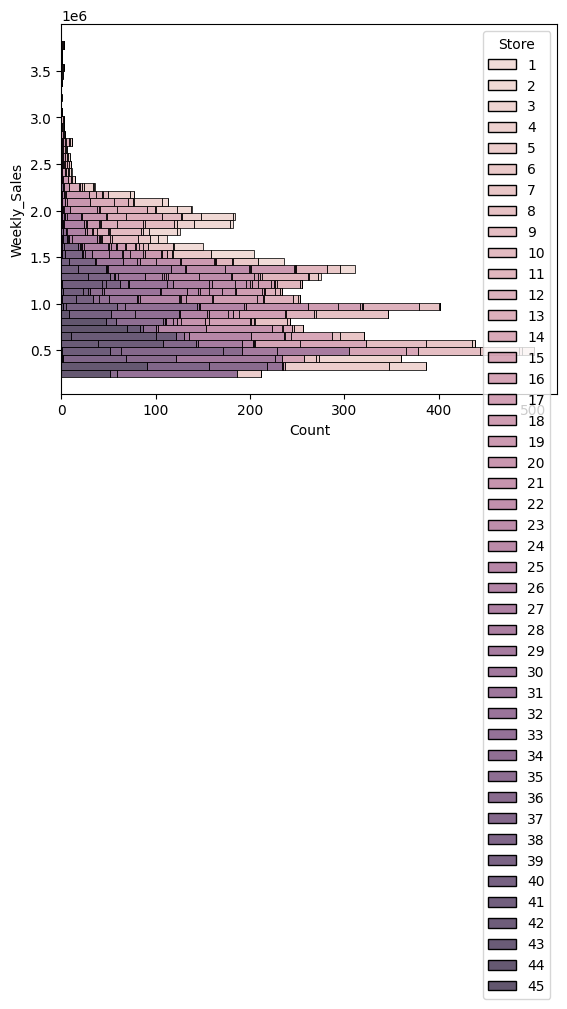

In [105]:
sns.histplot(y='Weekly_Sales', data=wd, bins=45, hue='Store', multiple='stack')
plt.show()

In [106]:
print(wd.loc[wd['Weekly_Sales'].idxmax()])

Store                            14
Date            2010-12-24 00:00:00
Weekly_Sales             3818686.45
Holiday_Flag                      0
Temperature                   30.59
Fuel_Price                    3.141
CPI                       182.54459
Unemployment                  8.724
Name: 1905, dtype: object


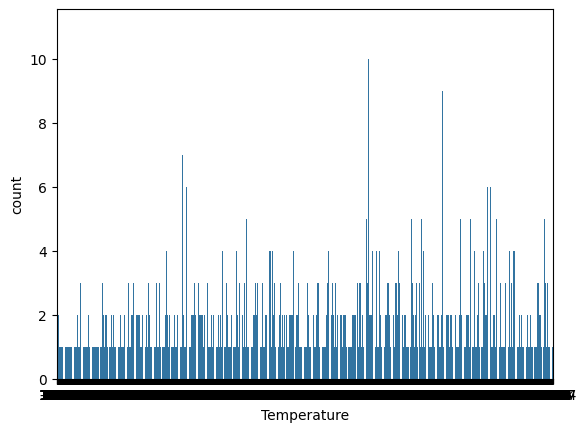

In [107]:
sns.countplot(x=wd.Temperature,data=wd)
plt.show()

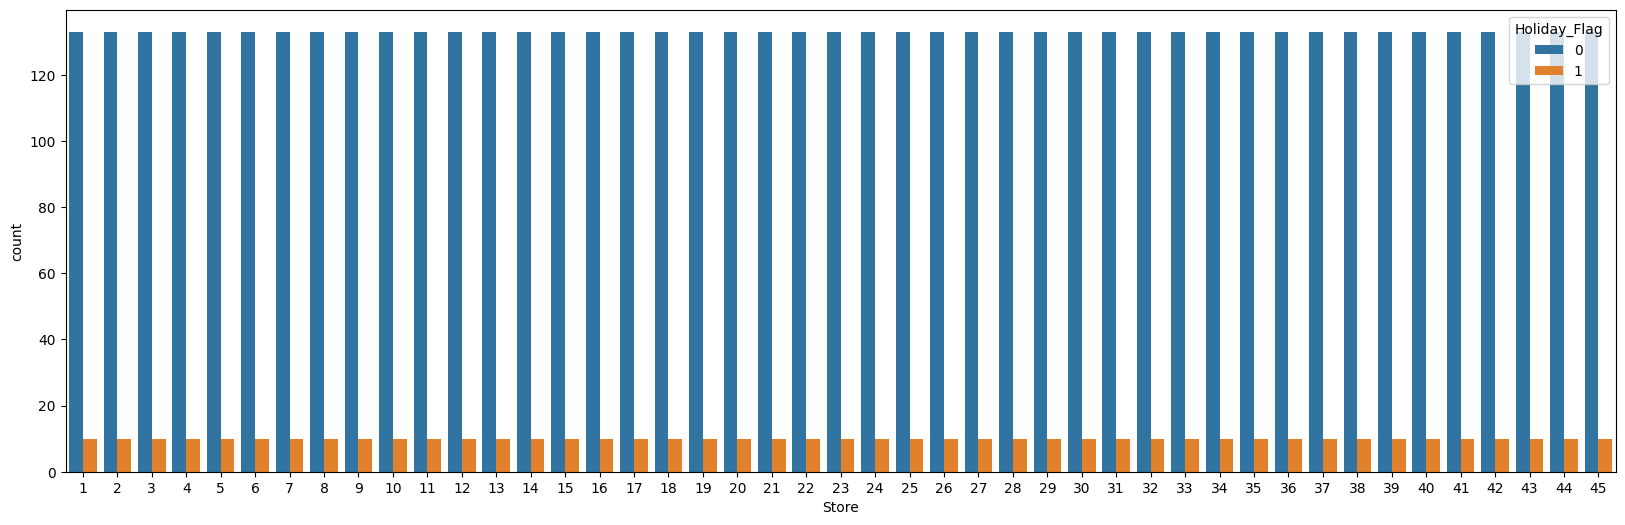

In [108]:
plt.figure(figsize=(20, 6))
sns.countplot(x=wd.Store,hue=wd.Holiday_Flag,data=wd)
plt.show()

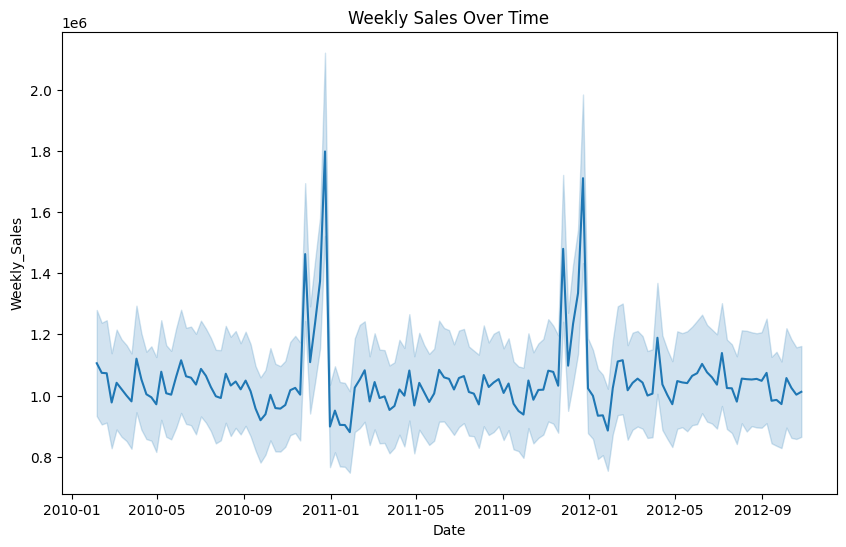

In [109]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=pd.to_datetime(wd['Date']), y=wd['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.show()

In [110]:
std_by_store = wd.groupby('Store')['Weekly_Sales'].std()
store_with_max_std = std_by_store.idxmax()
mean_to_std_ratio = wd.groupby('Store')['Weekly_Sales'].mean() / std_by_store

print(f"Store with max std: {store_with_max_std}")
print(f"Mean to std ratio:\n{mean_to_std_ratio}")

Store with max std: 14
Mean to std ratio:
Store
1      9.970873
2      8.102160
3      8.694034
4      7.868902
5      8.426840
6      7.362531
7      5.068303
8      8.550456
9      7.880502
10     6.284032
11     8.179167
12     7.250300
13     7.546394
14     6.363884
15     5.171059
16     6.053978
17     7.966815
18     6.140790
19     7.536924
20     7.639263
21     5.872253
22     6.378248
23     5.564175
24     8.088169
25     6.255458
26     9.081773
27     7.398888
28     7.281744
29     5.442400
30    19.227797
31    11.091264
32     8.452336
33    10.767931
34     9.239989
35     4.353863
36     6.150859
37    23.761933
38     9.019129
39     6.670767
40     8.101772
41     6.748681
42    11.069866
43    15.599741
44    12.225939
45     6.038183
Name: Weekly_Sales, dtype: float64


<Axes: xlabel='Store'>

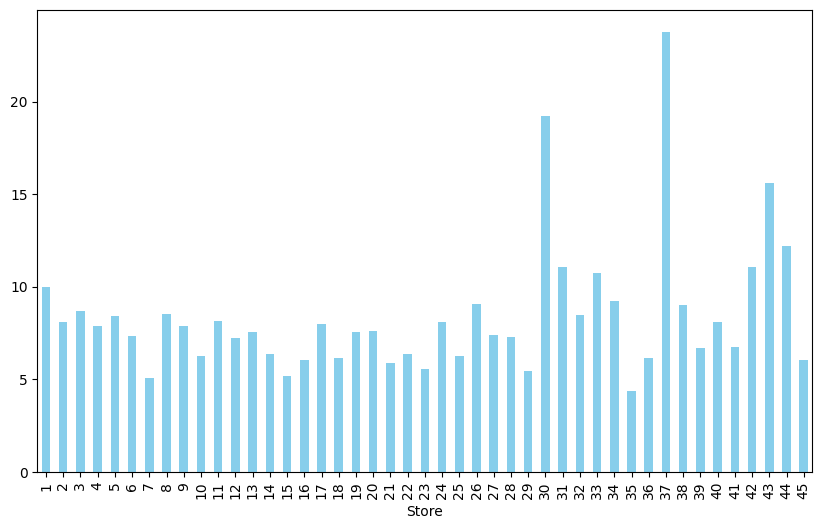

In [111]:
std_by_store = wd.groupby('Store')['Weekly_Sales'].std()
mean_to_std_ratio = wd.groupby('Store')['Weekly_Sales'].mean() / std_by_store
plt.figure(figsize=(10, 6))
mean_to_std_ratio.plot(kind='bar', color='skyblue')

In [112]:
wd['Date'] = pd.to_datetime(wd['Date'])
q3 = wd[(wd['Date'] >= '2012-07-01') & (wd['Date'] <= '2012-09-30')]
q3.head()
q3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 585 entries, 126 to 6430
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         585 non-null    int64         
 1   Date          585 non-null    datetime64[ns]
 2   Weekly_Sales  585 non-null    float64       
 3   Holiday_Flag  585 non-null    int64         
 4   Temperature   585 non-null    float64       
 5   Fuel_Price    585 non-null    float64       
 6   CPI           585 non-null    float64       
 7   Unemployment  585 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 41.1 KB


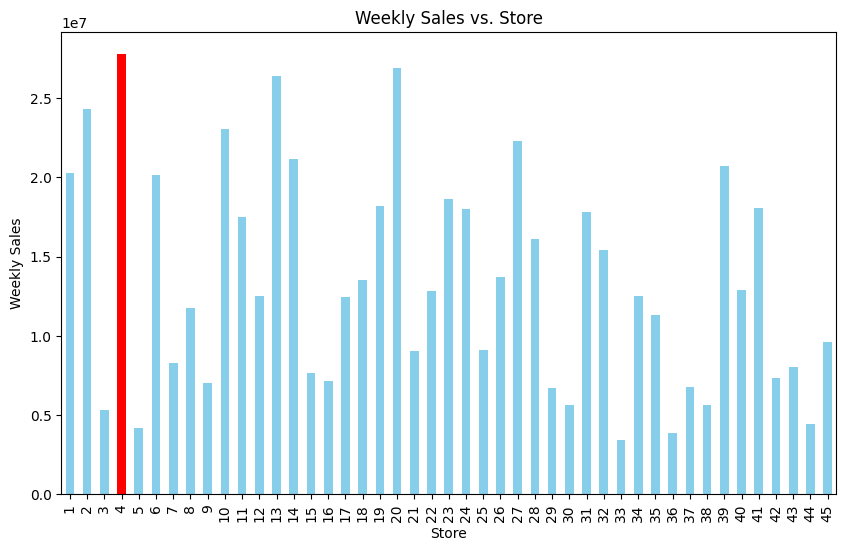

In [113]:
sales_by_store = q3.groupby('Store')['Weekly_Sales'].sum()
plt.figure(figsize=(10, 6))
sales_by_store.plot(kind='bar', color=['skyblue' if store != sales_by_store.idxmax() else 'red' for store in sales_by_store.index])
plt.title('Weekly Sales vs. Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_14708\1569310258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['Date'] = pd.to_datetime(q3['Date'])


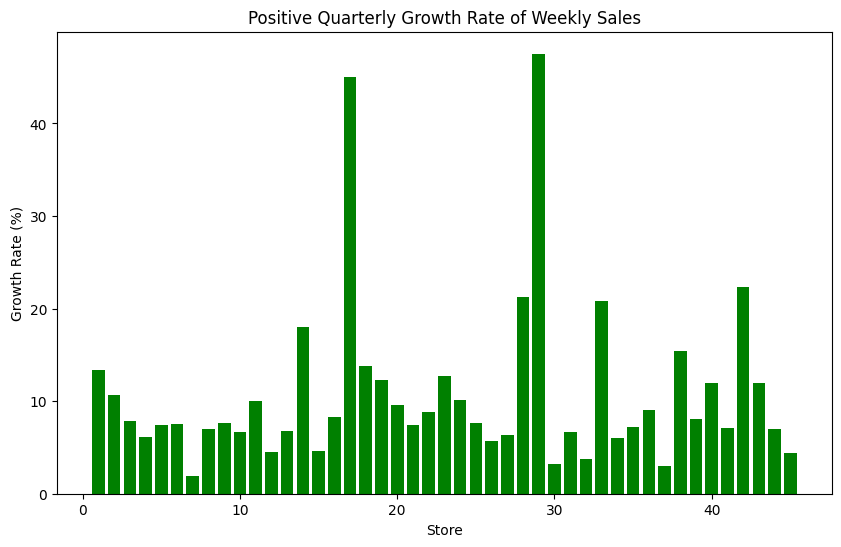

Store 29 has the highest positive growth rate.


In [114]:
q3['Date'] = pd.to_datetime(q3['Date'])
q3_sorted = q3.sort_values(['Store', 'Date'])

q3_sorted['Growth_Rate'] = q3_sorted.groupby('Store')['Weekly_Sales'].pct_change() * 100

positive_growth = q3_sorted[q3_sorted['Growth_Rate'] > 0]

max_growth_store = positive_growth.groupby('Store')['Growth_Rate'].max().idxmax()

plt.figure(figsize=(10, 6))
plt.bar(positive_growth['Store'], positive_growth['Growth_Rate'], color='green')
plt.title('Positive Quarterly Growth Rate of Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Growth Rate (%)')
plt.show()

print(f"Store {max_growth_store} has the highest positive growth rate.")

In [115]:
wd['Date'] = pd.to_datetime(wd['Date'])

holidays = [
    '2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08',  
    '2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06',  
    '2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29',  
    '2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27'   
]

h = wd[wd['Date'].isin(holidays)].copy()
h['Holiday_Flag'] = 1

h = pd.concat([h, wd[wd['Holiday_Flag'] == 1]])

h.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742


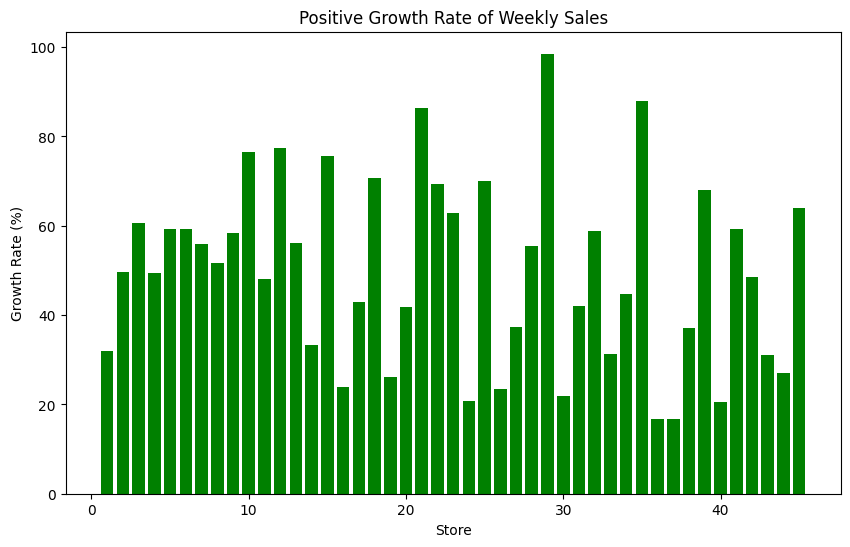

Store 29 has the highest positive growth rate.


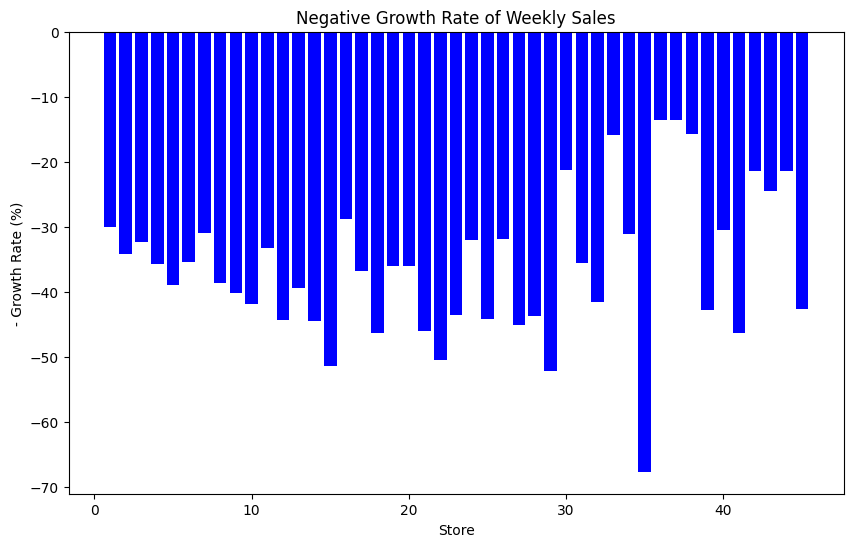

Store 35 has the highest negative growth rate.


In [116]:
h['Date'] = pd.to_datetime(h['Date'])
h_sorted = h.sort_values(['Store', 'Date'])

h_sorted['Growth_Rate'] = h_sorted.groupby('Store')['Weekly_Sales'].pct_change() * 100

positive_growth = h_sorted[h_sorted['Growth_Rate'] > 0]
n_growth = h_sorted[h_sorted['Growth_Rate'] < 0]

max_growth_store = positive_growth.groupby('Store')['Growth_Rate'].max().idxmax()
min_growth_store = n_growth.groupby('Store')['Growth_Rate'].min().idxmin()

plt.figure(figsize=(10, 6))
plt.bar(positive_growth['Store'], positive_growth['Growth_Rate'], color='green')
plt.title('Positive Growth Rate of Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Growth Rate (%)')
plt.show()

print(f"Store {max_growth_store} has the highest positive growth rate.")

plt.figure(figsize=(10, 6))
plt.bar(n_growth['Store'], n_growth['Growth_Rate'], color='blue')
plt.title('Negative Growth Rate of Weekly Sales')
plt.xlabel('Store')
plt.ylabel('- Growth Rate (%)')
plt.show()

print(f"Store {min_growth_store} has the highest negative growth rate.")


Holidays with higher sales than mean sales in non-holiday season for all stores:
           Date  Weekly_Sales
1    2010-02-12    1641957.44
31   2010-09-10    1507460.69
42   2010-11-26    1955624.11
47   2010-12-31    1367320.01
53   2011-02-11    1649614.93
...         ...           ...
5819 2011-12-30    1264014.16
5825 2012-02-10    1238844.56
5855 2012-09-07    1392143.82
6334 2010-11-26    1182500.16
6386 2011-11-25    1170672.94

[220 rows x 2 columns]


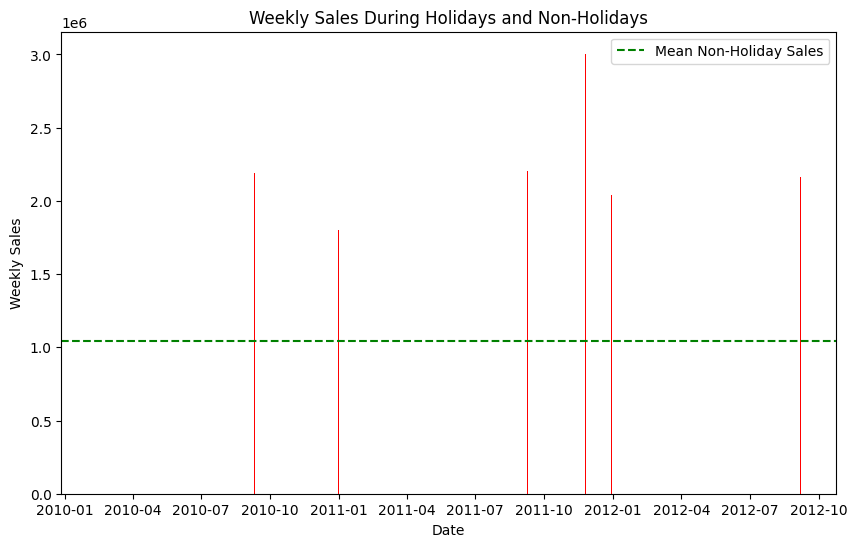

In [117]:

wd['Date'] = pd.to_datetime(wd['Date'])

# mean sales Non-holiday season
non_holiday_sales = wd[wd['Holiday_Flag'] == 0]['Weekly_Sales']
mean_non_holiday_sales = non_holiday_sales.mean()

# Holidays with higher sales
higher_than_mean_holidays = wd[(wd['Holiday_Flag'] == 1) & (wd['Weekly_Sales'] > mean_non_holiday_sales)]

print("Holidays with higher sales than mean sales in non-holiday season for all stores:")
print(higher_than_mean_holidays[['Date', 'Weekly_Sales']])

plt.figure(figsize=(10, 6))
plt.bar(h['Date'], h['Weekly_Sales'], color=['red' if flag == 1 else 'blue' for flag in h['Holiday_Flag']])
plt.axhline(y=mean_non_holiday_sales, color='green', linestyle='--', label='Mean Non-Holiday Sales')
plt.title('Weekly Sales During Holidays and Non-Holidays')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

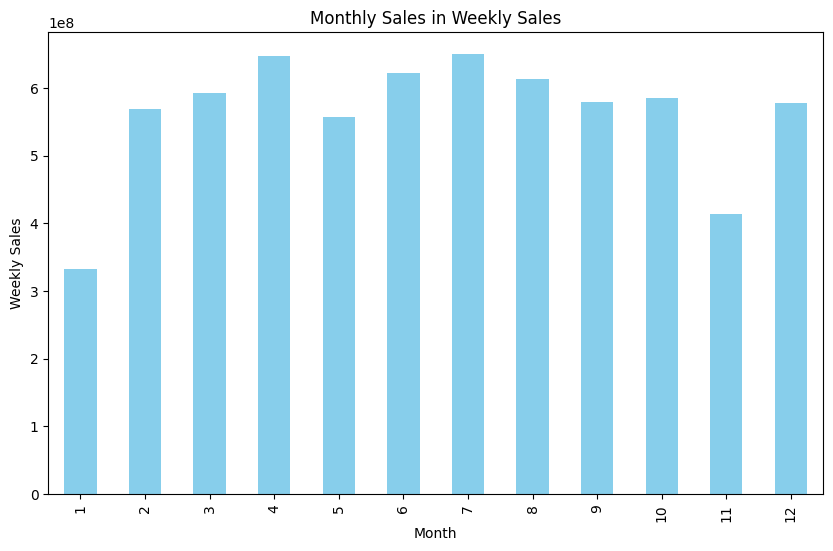

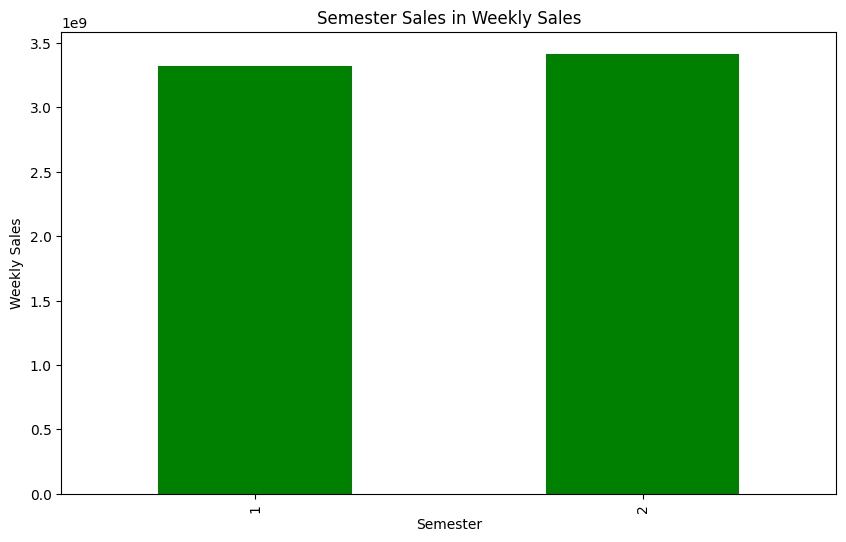

In [118]:
wd['Date'] = pd.to_datetime(wd['Date'])

# Extract month and semester information
wd['Month'] = wd['Date'].dt.month
wd['Semester'] = wd['Date'].dt.month.apply(lambda x: 1 if x <= 6 else 2)

# Monthly sales plot
monthly_sales = wd.groupby('Month')['Weekly_Sales'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales in Weekly Sales')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

# Semester sales plot (January to June as Semester 1, July to December as Semester 2)
semester_sales = wd.groupby('Semester')['Weekly_Sales'].sum()

plt.figure(figsize=(10, 6))
semester_sales.plot(kind='bar', color='green')
plt.title('Semester Sales in Weekly Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly Sales')
plt.show()

Semester and weekly wise sales are balanced

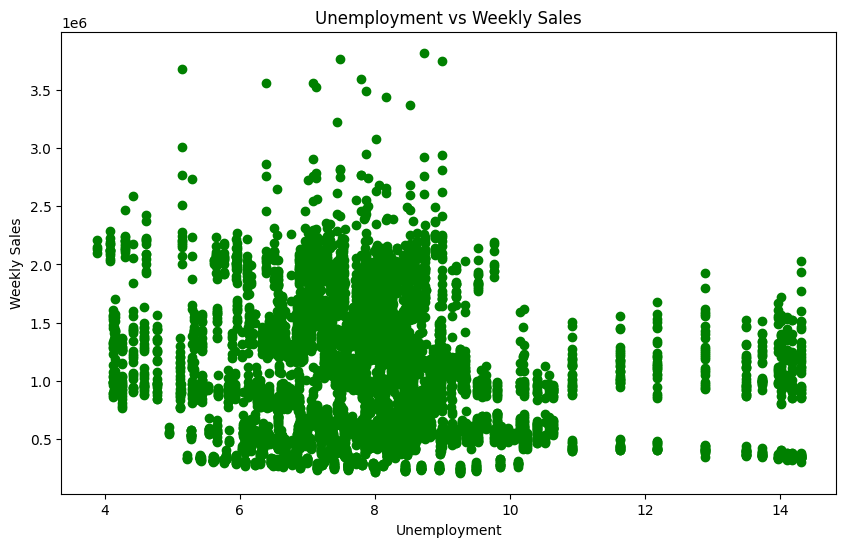

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(wd['Unemployment'], wd['Weekly_Sales'], color='green')
plt.title('Unemployment vs Weekly Sales')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

Unemployment is mostly between 6 and 8

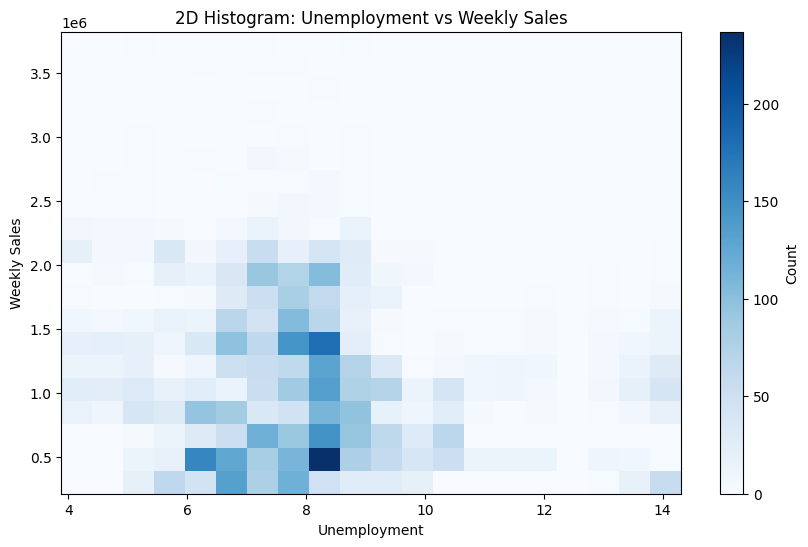

In [120]:
plt.figure(figsize=(10, 6))
plt.hist2d(wd['Unemployment'], wd['Weekly_Sales'], bins=(20, 20), cmap='Blues')
plt.colorbar(label='Count')
plt.title('2D Histogram: Unemployment vs Weekly Sales')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

weekly sales affected most when unemployment was near 8%

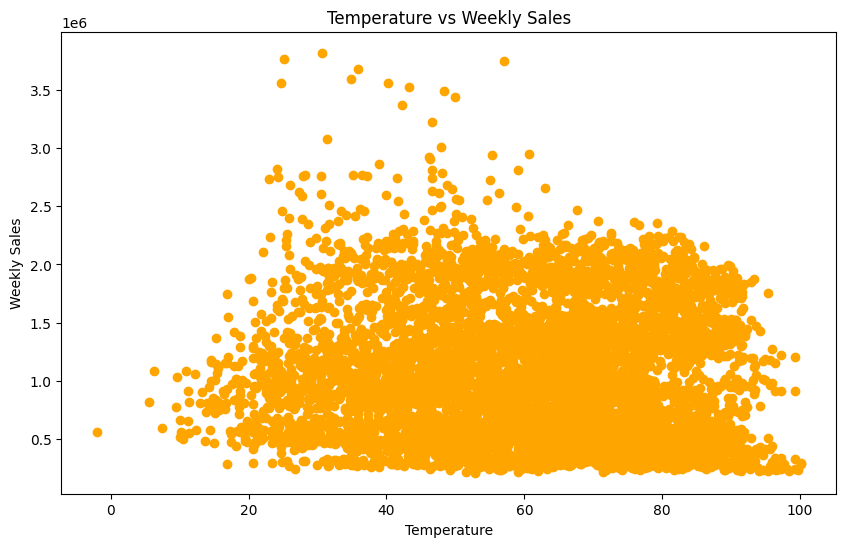

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(wd['Temperature'], wd['Weekly_Sales'], color='orange')
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

An ideal temperature is needed for the sales to happen

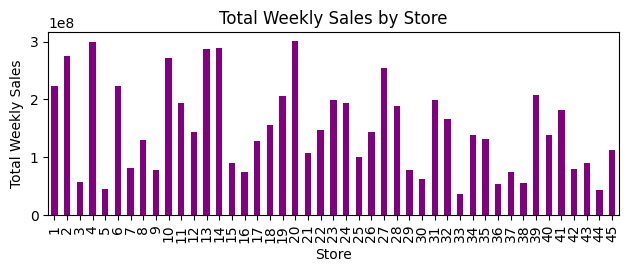

In [122]:
weekly_sales_by_store = wd.groupby('Store')['Weekly_Sales'].sum()
plt.subplot(2, 1, 2)
weekly_sales_by_store.plot(kind='bar', color='purple')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')

plt.tight_layout()
plt.show()


store 5, 34 and 44 has lowest

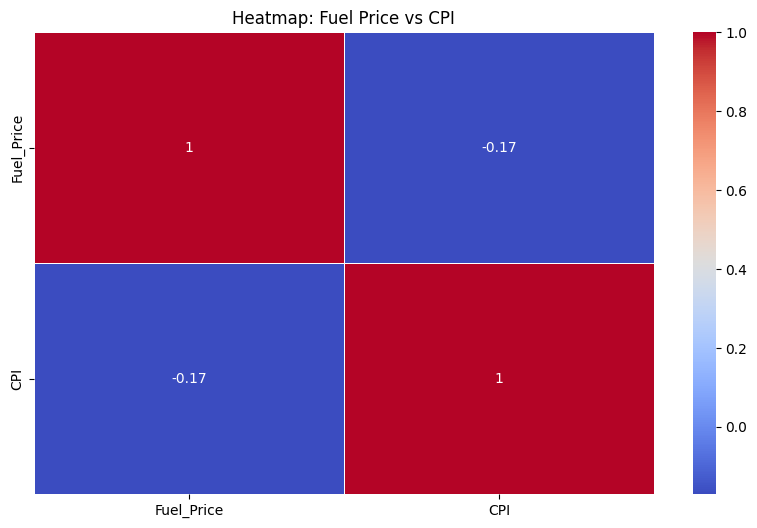

In [123]:
plt.figure(figsize=(10, 6))

sns.heatmap(pd.DataFrame({'Fuel_Price': wd['Fuel_Price'], 'CPI': wd['CPI']}).corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap: Fuel Price vs CPI')
plt.show()

The CPI increases when Fuel_Price is low.

In [124]:
s1 = wd[wd['Store'] == 1].copy()
s1 = s1.drop(columns=['Store'])
s1 = s1.sort_values(by='Date')
s1.head(5)

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Semester
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,1
1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,1
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,1
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,1
4,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,1


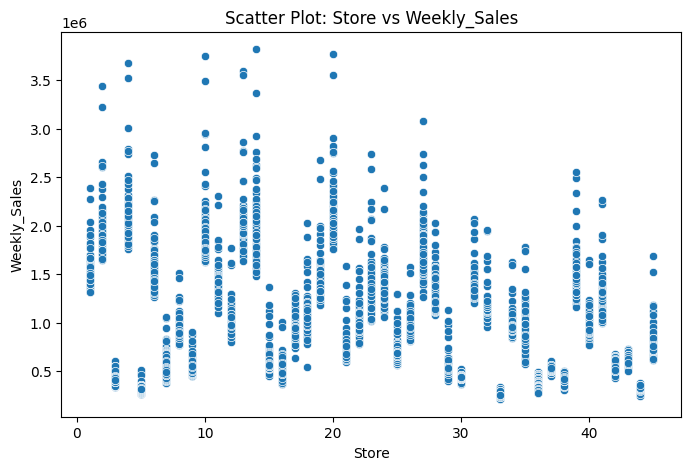

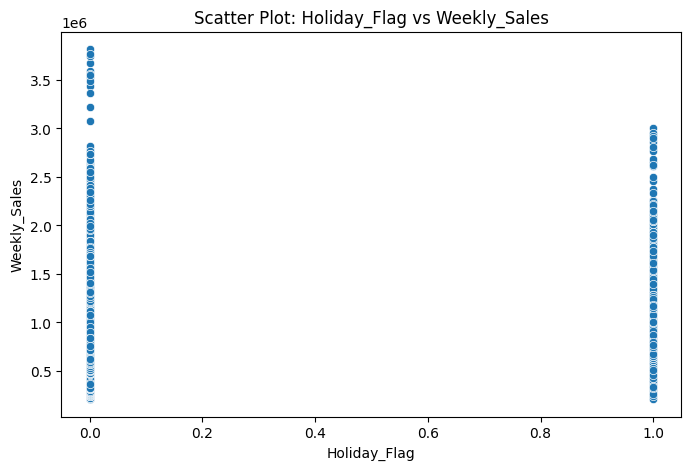

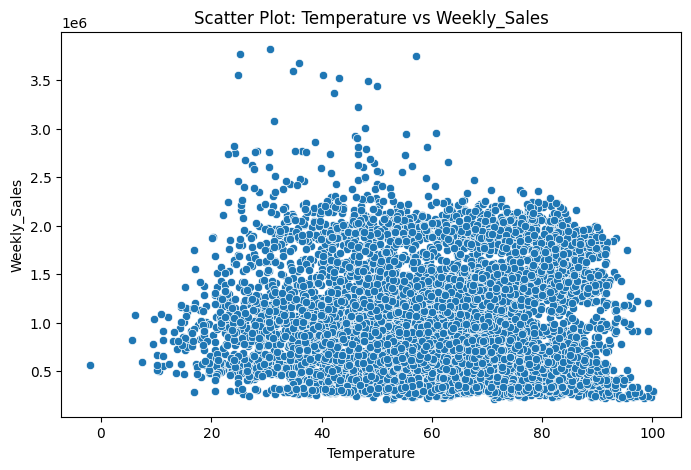

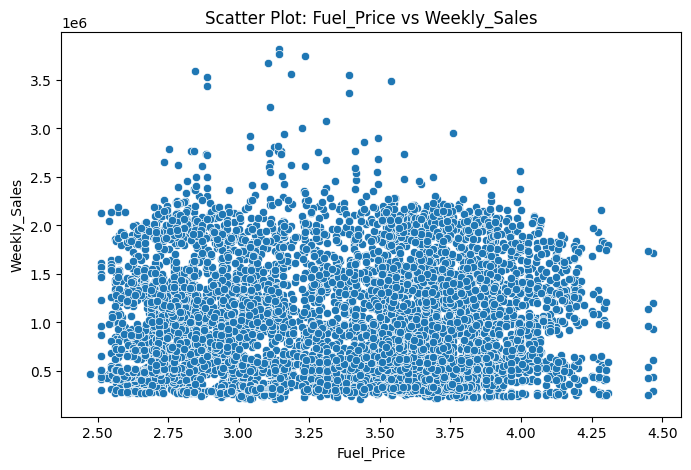

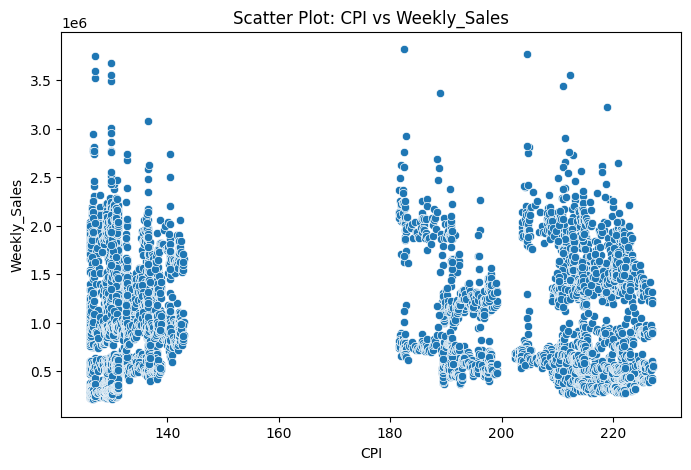

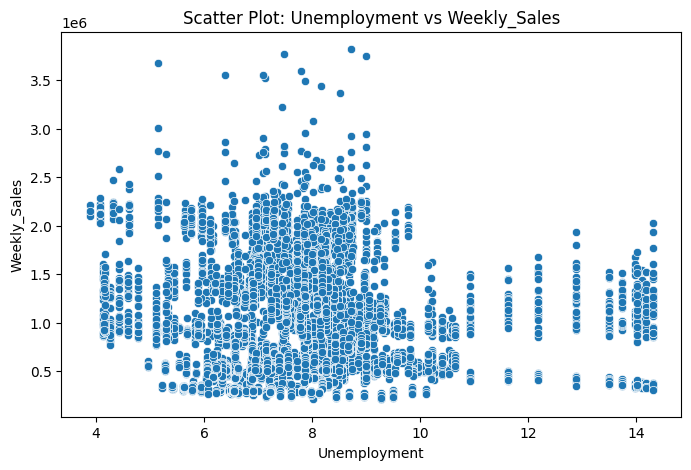

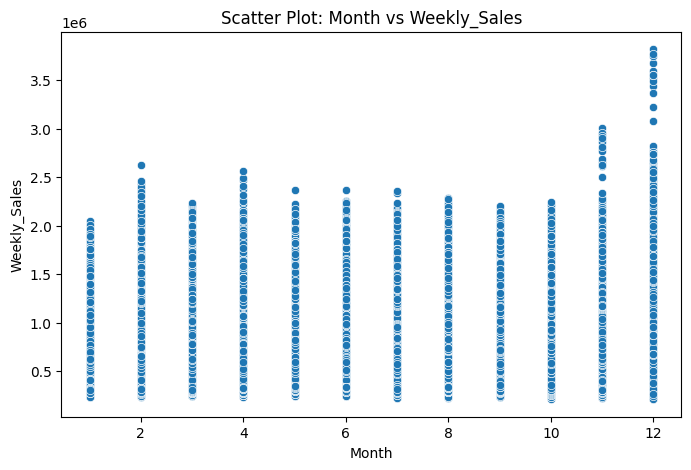

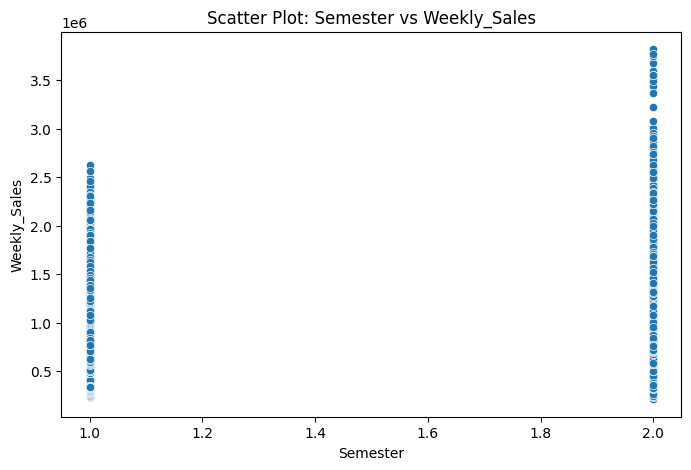

In [125]:
for column in wd.select_dtypes(include='number').columns:
    if column != 'Weekly_Sales':  # Avoid plotting 'Weekly_Sales' against itself
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=wd, x=column, y='Weekly_Sales')
        plt.title(f'Scatter Plot: {column} vs Weekly_Sales')
        plt.xlabel(column)
        plt.ylabel('Weekly_Sales')
        plt.show()

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

s1['Date'] = pd.to_datetime(s1['Date'])
s1['Days'] = (s1['Date'] - s1['Date'].min()).dt.days + 1  

X = s1[['Days', 'CPI', 'Unemployment', 'Fuel_Price']] # Feature
y = s1['Weekly_Sales'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)


print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


R-squared: -0.04391320369979512
Coefficients: [  -152.3525031   32824.47514224 113100.11922431 -68166.72375455]
Intercept: -6104933.094951026


In [127]:
from sklearn.metrics import mean_absolute_error

s1['Date'] = pd.to_datetime(s1['Date']) 

features = ['CPI', 'Unemployment', 'Fuel_Price']  

for feature in features:
    X = s1[[feature]]  
    y = s1['Weekly_Sales']  # Target

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)  # random_state - reproducibility

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r_squared = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f'R-squared for {feature}: {r_squared:.4f}')
    print(f'Mean Absolute Error for {feature}: {mae:.4f}')
    print()

R-squared for CPI: 0.0171
Mean Absolute Error for CPI: 127816.3924

R-squared for Unemployment: 0.0139
Mean Absolute Error for Unemployment: 133026.2602

R-squared for Fuel_Price: 0.0103
Mean Absolute Error for Fuel_Price: 131229.4306



In [128]:
s1['Days'] = (s1['Date'] - s1['Date'].min()).dt.days + 1 
s1.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Semester,Days
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,1,1
1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,1,8
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,1,15
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,1,22
4,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,1,29


The model using 'CPI' is better because it fits the data well (high R-squared) and its predictions are closer to the actual values (low Mean Absolute Error).